# Hands-on Session 1

This hands-on session comprise of two main sections:
1. Probability and statistics
2. Bayesian linear regression

**To get started:** Go to 'File' --> select 'Save a copy in drive'.

# Exercise 01: Probability and Statistics

In the first exercise, we will be discussing about the following topics:
1. Sample space
2. Central limit theorem
2. Random variables
3. Probability distributions
4. Summary statistics
6. Bayes theorem

In [ ]:
# Importing libraries
import numpy as np
from scipy.stats import multivariate_normal

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

csmlColor = {'red': '#c40000',
             'blue': '#006efe',
             'black':'#000000',
             'yellow': '#cece00',
             'darkBlue': "#004989",
             }

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Sample Space
Sample space is the set of all possible outcomes of an experiment. For example, if we roll a dice, the sample space is {1, 2, 3, 4, 5, 6}. Lets say that we roll a dice randomly 1000 times. Lets see the frequency of each face in the 1000 rolls.

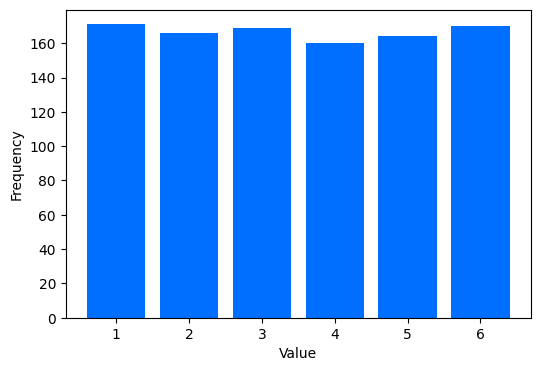

In [ ]:
np.random.seed(1) # set seed for reproducibility

n_samples = 1000
data_uniform = np.random.randint(1, 7, n_samples) # generate random numbers between 1 and 6
unique, counts = np.unique(data_uniform, return_counts=True)

plt.figure(figsize = (6,4))
plt.bar(unique, counts, color=csmlColor['blue'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(range(1,7))
plt.show()

## Central Limit Theorem

The central limit theorem states that the distribution of the sum (or average) of a large number of independent, identically distributed variables approaches a normal (Gaussian) distribution, regardless of the shape of the original distribution. This is the reason why Gaussian distribution is so important in statistics.

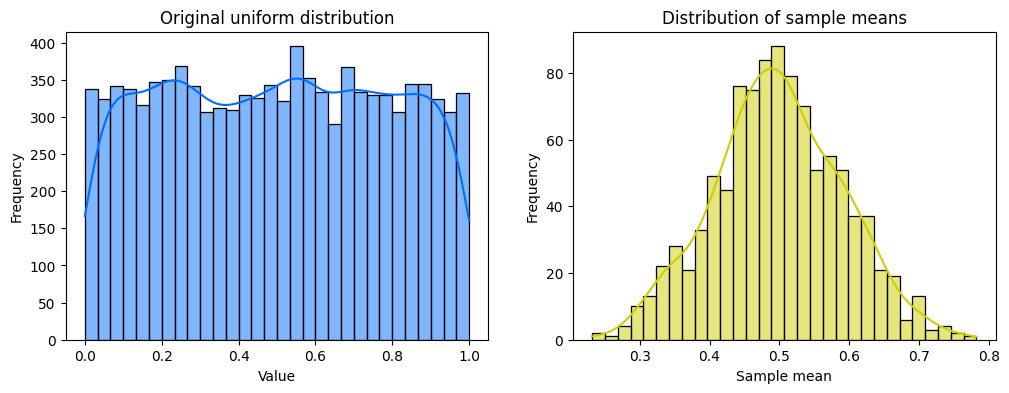

In [ ]:
# Set the seed for reproducibility
np.random.seed(1)

# Number of samples and sample size
n_samples = 1000  # Total number of samples
sample_size = 10  # Each sample contains 10 observations

# Generate random data from a uniform distribution (between 0 and 1) and calculate the mean of each sample
uniform_data = np.random.uniform(0, 1, size=(n_samples, sample_size))
means_of_samples = np.mean(uniform_data, axis=1)


plt.figure(figsize=(12, 4))

# Plot the original uniform distribution
plt.subplot(1, 2, 1)
sns.histplot(uniform_data.flatten(), bins=30, kde=True, color=csmlColor['blue'])
plt.title('Original uniform distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plot the distribution of sample means (similar to a normal distribution)
plt.subplot(1, 2, 2)
sns.histplot(means_of_samples, bins=30, kde=True, color=csmlColor['yellow'])
plt.title('Distribution of sample means')
plt.xlabel('Sample mean')
plt.ylabel('Frequency')

plt.show()

## Random Variables and Probability Distributions
Let's start with Random Variables.
Each time you roll a die the outcome will be between 1 and 6. If we rolled a fair die a million times we'd expect to get a one 1/6 of the time. Thus we say the probability, or odds of the outcome 1 is 1/6. Likewise, if I asked you the chance of 1 being the result of the next roll you'd reply 1/6. This is a random variable. It is a variable because it can take on different values, and it is random because we don't know what the value will be.

Let's plot the probability distribution of the dice roll. This is a discrete probability distribution because the values are discrete. It is also known as a probability mass function.

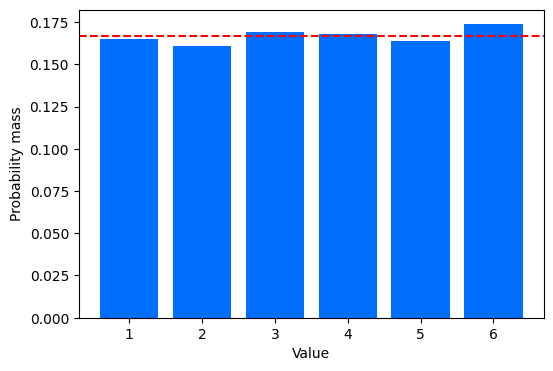

In [ ]:
np.random.seed(1) # set seed for reproducibility
n=10000 # number of samples
data_uniform=np.random.randint(1, 7, n) # generate random numbers between 1 and 6
unique, counts = np.unique(data_uniform, return_counts=True) # count the frequency of each number
total_numbers = len(data_uniform)
probabilities = counts / total_numbers

# plot the probabilities
plt.figure(figsize = (6,4))
plt.bar(unique, probabilities, color=csmlColor['blue'])
plt.axhline(y=(1/6), color='red', linestyle='--')
plt.xlabel('Value')
plt.ylabel('Probability mass')
plt.xticks(range(1,7))
plt.show()

Lets say that we have a random variable that is continuous. For example, the height of a student in a school. This is a continuous random variable. The probability distribution of a continuous random variable is called a probability density function which follows
$$
f(\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\big [{-\frac{(x-\mu)^2}{2\sigma^2} }\big ] \tag{1}
$$

Where, $\mu$ is the mean of the distribution and $\sigma$ is the standard deviation of the distribution.

However, in practice, we don't have access to infinite data points to calculate the probability density function. We can only calculate the probability density function for a finite number of data points. Therefore, we have to put the data points into bins and calculate the probability of each bin.

<Figure size 600x400 with 0 Axes>

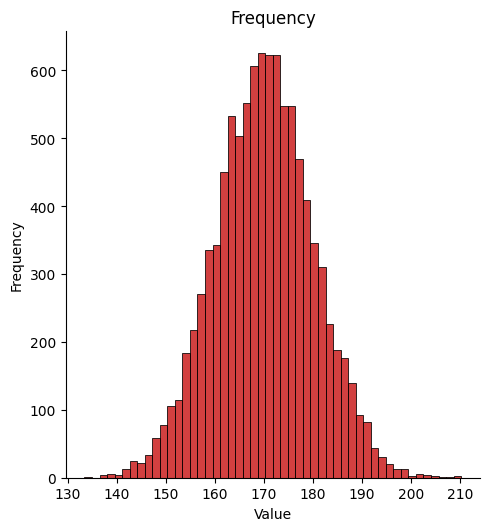

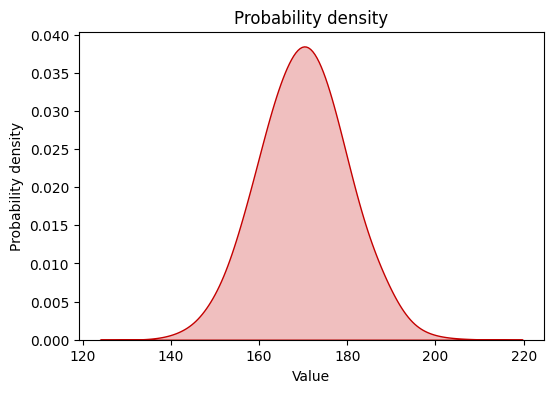

In [ ]:
# Set the seed for reproducibility
np.random.seed(1)

# Data generation
mu = 170
sigma = 10
n_samples = 10000
data_normal = np.random.normal(170, 10, n_samples)

# Plot the histogram of the data
plt.figure(figsize=(6, 4))
sns.displot(data_normal, bins=50, color=csmlColor['red'], kde=False)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency')
plt.show()

# Plot probability density
plt.figure(figsize=(6, 4))
sns.kdeplot(data_normal, color=csmlColor['red'], fill=True, bw_adjust=2) # plot using seaborn kdeplot: bw_adjust is to adjust smoothness
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.title('Probability density')
plt.show()

## Summary Statistics
Summary statistics are numbers that summarise properties of the data. For example, mean and variance.

For a discrete random variable, the mean/expected value is given by
$$ \text{E}[x] = \mu = \sum_{i=1}^{n} x_i p(x_i), \tag{2}$$
where $x_i$ is the value of the random variable and $p(x_i)$ is the probability of the random variable taking the value $x_i$.

The variance of a discrete random variable is given by
$$ \text{E}[(x-\mu)^2] = \sigma^2 = \sum_{i=1}^{n} (x_i - \mu)^2 p(x_i). \tag{3}$$

The statistics mean, variance, skewness and kurtosis are also known as moments of the distribution. These moments describe key characteristics of the distribution.

Let's plot a Gaussian distribution and see how the mean and variance affect the distribution.

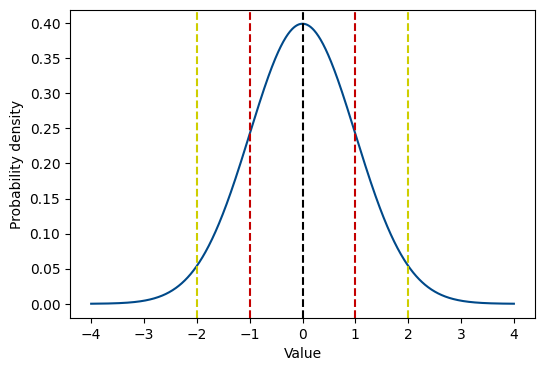

In [ ]:
# Probability density function of the normal distribution
def normal_pdf(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x-mu)/sigma)**2)

# Generate values
data_normal_x = np.linspace(-4, 4, 1000)
data_normal_y = normal_pdf(data_normal_x, 0, 1)

# Plot the normal distribution
plt.figure(figsize = (6,4))
plt.plot(data_normal_x, data_normal_y, color=csmlColor['darkBlue'])

# Highlight mean, 1-SD, 2-SD, -1-SD, -2-SD
plt.axvline(x=0, color='black', linestyle='--')
plt.axvline(x=1, color=csmlColor['red'], linestyle='--')
plt.axvline(x=-1, color=csmlColor['red'], linestyle='--')
plt.axvline(x=2, color=csmlColor['yellow'], linestyle='--')
plt.axvline(x=-2, color=csmlColor['yellow'], linestyle='--')

plt.xlabel('Value')
plt.ylabel('Probability density')
plt.show()

In the above plot we can see that the two red lines correspond to $\sigma=1$. The area between these two lines is 68% of the total area under the curve. The area between the two yellow lines corresponds to $\sigma=2$ and is 95% of the total area under the curve.

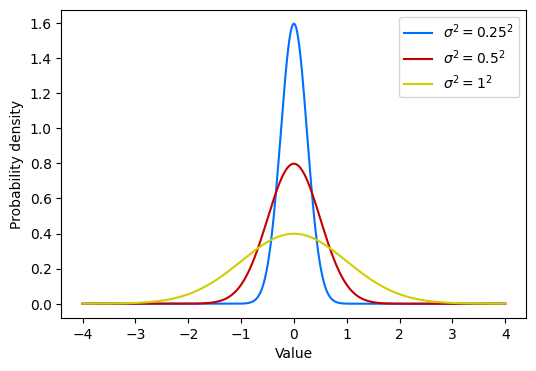

In [ ]:
data_normal_x = np.linspace(-4., 4., 1000)
pdf_1 = normal_pdf(data_normal_x, 0., 0.25) # mean = 0, standard deviation = 0.25
pdf_2 = normal_pdf(data_normal_x, 0., 0.5) # mean = 0, standard deviation = 0.5
pdf_3 = normal_pdf(data_normal_x, 0., 1) # mean = 0, standard deviation = 1

# Plot the normal distribution
plt.figure(figsize=(6,4))
plt.plot(data_normal_x, pdf_1, color = csmlColor['blue'],label = '$\sigma^2=0.25^2$')
plt.plot(data_normal_x, pdf_2, color = csmlColor['red'],label = '$\sigma^2=0.5^2$')
plt.plot(data_normal_x, pdf_3, color = csmlColor['yellow'],label = '$\sigma^2=1^2$')
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.legend()
plt.show()

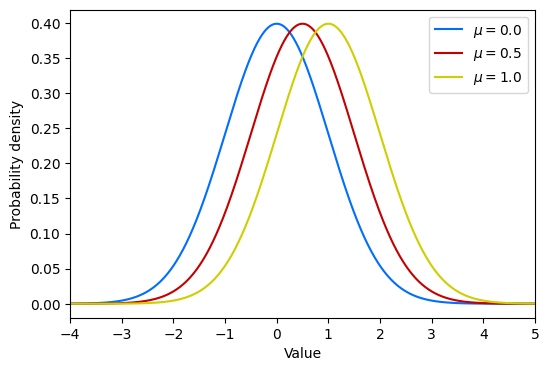

In [ ]:
data_normal_x = np.linspace(-4., 5., 1000)
pdf_1 = normal_pdf(data_normal_x, 0., 1) # mean = 0, standard deviation = 1
pdf_2 = normal_pdf(data_normal_x, 0.5, 1) # mean = 0.5, standard deviation = 1
pdf_3 = normal_pdf(data_normal_x, 1., 1) # mean = 1, standard deviation = 1
plt.figure(figsize=(6,4))
plt.xlim(-4, 5)
plt.plot(data_normal_x, pdf_1, color = csmlColor['blue'],label = '$\mu=0.0$')
plt.plot(data_normal_x, pdf_2, color = csmlColor['red'],label = '$\mu=0.5$')
plt.plot(data_normal_x, pdf_3, color = csmlColor['yellow'],label = '$\mu=1.0$')
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.legend()
plt.show()

## Bayes Theorem
Bayes theorem is a fundamental theorem in probability theory. Bayes theorem tells us how to compute the probability of an event, given prior information as

$$
{posterior} = \frac{{likelihood}\times {prior}}{{evidence}} , \tag{4}
$$
where the posterior is the probability of the event given the prior information, the likelihood is the probability of the prior information given the event, the prior is the probability of the event and the normalisation is the probability of the prior information.

In mathematical terms, Bayes theorem can be written as
$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)} , \tag{5}
$$
where $P(A|B)$ is the probability of event A given that event B has occurred, $P(B|A)$ is the probability of event B given that event A has occurred, $P(A)$ is the probability of event A and $P(B)$ is the probability of event B.

This can be applied to sample spaces which follow a probability distribution. For example, let's say that we have a sample space which follows a Gaussian distribution. We can use Bayes theorem to find the probability of a particular event given that another event has occurred.

Suppose we have a prior ditribution with $p(x)$ and likelihood $p(y|x)$ of the form
\begin{equation}
  \begin{aligned}
    p(x) & = \mathcal{N}(x:\mu_0, \sigma_0^2) \\
    p(y|x) & = \mathcal{N}(y|x:\mu, \sigma^2)
  \end{aligned} \text{,} \tag{6}
\end{equation}
where $\mu_0$ and $\sigma_0^2$ are the prior mean and variance, respectively, and $\sigma^2$ is the variance of the likelihood.

Suppose that we need to find the posterior distribution and visualise for a set of parameters.

We can start by applying the Bayes rule.
\begin{equation}
  \begin{aligned}
    p(x|y) & = \frac{p(y|x)p(x)}{p(y)} \\
    & = \frac{p(y|x)p(x)}{\int p(y|x)p(x)dx}
  \end{aligned} \text{.}
\end{equation}

To obtain the posterior distribution, we first derive $p(y|x)p(x)$ as
\begin{equation}
  \begin{aligned}
    p(y|x)p(x) & = \mathcal{N}(y|x:\mu, \sigma^2)\mathcal{N}(x:\mu_0, \sigma_0^2) \\
    & = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{1}{2\sigma^2}(y-x)^2\right)\frac{1}{2\pi\sigma_0^2}\exp\left(-\frac{1}{2\sigma_0^2}(x-\mu_0)^2\right) \\
    & = \frac{1}{\sqrt{2\pi\sigma^2}}\frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\left(-\frac{1}{2\sigma^2}(y-x)^2 - \frac{1}{2\sigma_0^2}(x-\mu_0)^2\right) \\
    %& = \frac{1}{2\pi\sqrt{\sigma^2 \sigma_0^2}}\exp\left(-\frac{1}{2\sigma^2}(y^2 - 2xy + x^2) - \frac{1}{2\sigma_0^2}(x^2 - 2\mu_0x + \mu_0^2)\right)
  \end{aligned} \text{.}
\end{equation}

We know that
\begin{equation}
\begin{aligned}
  p(x|y)  & \propto p(y|x)p(x) \\
          & \propto \exp{\left(-\frac{1}{2\sigma^2}(y-x)^2 - \frac{1}{2\sigma_0^2}(x-\mu_0)^2\right)}
\end{aligned} \text{.}
\end{equation}

Let's expand the above exponential to derive the posterior distribution.
\begin{equation}
\begin{aligned}
  p(x|y)  & \propto \exp{\left(-\frac{1}{2\sigma^2}(y^2 - 2xy + x^2) - \frac{1}{2\sigma_0^2}(x^2 - 2\mu_0x + \mu_0^2)\right)} \\
          & = \exp{\left(-\frac{1}{2}(\frac{1}{\sigma^2} + \frac{1}{\sigma_0^2})x^2 + (\frac{y}{\sigma^2}+ \frac{\mu_0}{\sigma_0^2})x - \frac{y^2}{2\sigma^2} - \frac{\mu_0^2}{2\sigma_0^2}\right)} \\
          & = \exp{\left(-\frac{1}{2}(\frac{\sigma^2 + \sigma_0^2}{\sigma^2\sigma_0^2})x^2 + \frac{\sigma_0^2y + \sigma^2\mu_0}{\sigma^2\sigma_0^2}x - \frac{y^2}{2\sigma^2} - \frac{\mu_0^2}{2\sigma_0^2}\right)} \\
          & \propto \exp{\left(-\frac{1}{2}(\frac{\sigma^2 + \sigma_0^2}{\sigma^2\sigma_0^2})x^2 + \frac{\sigma_0^2y + \sigma^2\mu_0}{\sigma^2\sigma_0^2}x\right)} \\
          & = \exp{\left(-\frac{1}{2}(\frac{\sigma^2 + \sigma_0^2}{\sigma^2\sigma_0^2})(x^2 - 2x\frac{\sigma_0^2y + \sigma^2\mu_0}{\sigma^2 + \sigma_0^2})\right)} \\
          & = \exp{\left(-\frac{1}{2}(\frac{x - \frac{\sigma_0^2y + \sigma^2\mu_0}{\sigma^2 + \sigma_0^2}}{\sqrt{\frac{\sigma^2\sigma_0^2}{\sigma^2 + \sigma_0^2}}})^2\right)} \\
          & = \exp{\left(-\frac{1}{2\sigma_p^2}(x - \mu_p)^2\right)}
\end{aligned} \text{,} \tag{7.1}
\end{equation}
where
\begin{equation}
  \begin{aligned}
    \mu_p & = \frac{\sigma^2\mu_0 + \sigma_0^2y}{\sigma^2 + \sigma_0^2} \\
    \sigma_p^2 & = \frac{\sigma^2\sigma_0^2}{\sigma^2 + \sigma_0^2}
  \end{aligned} \text{.} \tag{7.2}
\end{equation}

This gives us the required posterior distribution.


Now let's plot the prior, likelihood and posterior distributions.

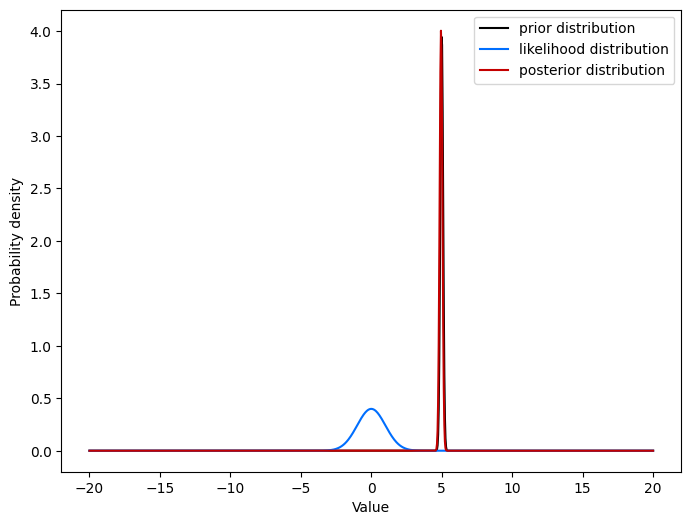

In [ ]:
def prior(x, mu0, sigma0):
    return np.exp(-0.5 * (x - mu0) ** 2 / sigma0 ** 2) / np.sqrt(2 * np.pi * sigma0 ** 2)

def likelihood(x, y, sigma):
    return np.exp(-0.5 * (y - x) ** 2 / sigma ** 2) / np.sqrt(2 * np.pi * sigma ** 2)

def posterior(x, y, mu0, sigma0, sigma):
    mu_p = (sigma ** 2 * mu0 + sigma0 ** 2 * y) / (sigma ** 2 + sigma0 ** 2)
    sigma_p = np.sqrt(sigma ** 2 * sigma0 ** 2 / (sigma ** 2 + sigma0 ** 2))
    return np.exp(-0.5 * (x - mu_p) ** 2 / sigma_p ** 2) / np.sqrt(2 * np.pi * sigma_p ** 2)


xx = np.linspace(-20, 20, 1000)
y = 0.0
mu0 = 5.0
sigma0 = 0.1 # Prior standard deviation
sigma = 1.0 # Likelihood standard deviation

plt.figure(figsize=(8,6))
plt.plot(xx, prior(xx, mu0, sigma0), label='prior distribution', color = csmlColor['black'])
plt.plot(xx, likelihood(xx, y, sigma), label='likelihood distribution', color = csmlColor['blue'])
plt.plot(xx, posterior(xx, y, mu0, sigma0, sigma), label='posterior distribution', color = csmlColor['red'])
plt.xlabel('Value')
plt.ylabel('Probability density')
plt.legend()
plt.show()

Questions to think about.
1. What happens when we change prior standard deviation ($\sigma_0$)?
2. What happens when we change standard deviation of the data that we have (i.e., likelihood): $\sigma$ ?

Answer - Q1: Prior standard deviation ($\sigma_0$) controls how much uncertainity we have in our prior beliefs. A larger prior standard deviation implies that we are less certain about the parameter values before seeing the data. The posterior distribution will be more strongly influenced by the likelihood, as the prior exerts less "pull" on the result.

Answer - Q2: The likelihood standard deviation ($\sigma$) measures the uncertainty in the observed data. A larger standard deviation in the likelihood indicates that the data is noisy, and each observation is less reliable. The posterior distribution will be more influenced by the prior since the data is less informative.

# Exercise 02: Bayesian linear regression

In this exercise, we will be discussing the following topics:
1. Linear regression using least squares
2. Maximum a posteriori estimation (MAP)
3. Posterior distribution


Let's consider this simplest case first. Suppose we have a model with input $\mathbf{x}$ and output vector $\mathbf{y}=[y_1,y_2,..,y_N]^T$,

\begin{equation}
\mathbf{y} = w \mathbf{x} + \boldsymbol{\epsilon} \tag{8}
\end{equation}

Let's consider $20$ data points.

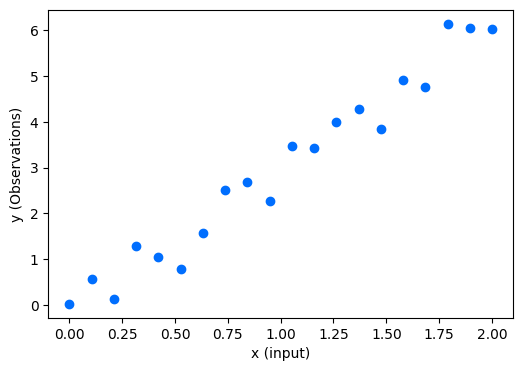

In [ ]:
np.random.seed(4) # Setting seed for reproducibility

n_points = 20
x = np.linspace(0,2,n_points).reshape(-1,1)
w_true = 3
mu_err, sigma_n = 0, 0.5
y = w_true*x + np.random.normal(mu_err, sigma_n, n_points).reshape(-1,1)

plt.figure(figsize=(6,4))
plt.scatter(x, y, color = csmlColor['blue'])
plt.xlabel('x (input)')
plt.ylabel('y (Observations)')
plt.show()

### Least squares regression

Let's find the gradient of the equation which minimises the sum of squared errors. The sum of squared errors is given by
\begin{align}
E(w) &= \sum\limits_{i=1}^{N}(y_i - wx_i)^2
\end{align}

By differentiating with respect to $w$, we get
\begin{align}
w_{lsq} &= \frac{\sum\limits_{i=1}^{N}y_ix_i}{\sum\limits_{i=1}^{N}x_i^2} \tag{9}
\end{align}

We can think of this as giving the average of $yx$ over the average of $x^2$. This give the gradient of the line.

In [ ]:
w_lsq = np.sum(x*y)/np.sum(np.square(x))
print(f'w_lsq = {w_lsq}')

w_lsq = 3.034271230168778


Now we can visualise the fit resulted by $w_{lsq}$ on the dataset.

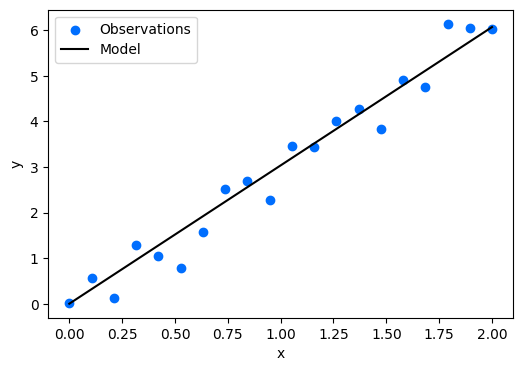

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(x, y, color = csmlColor['blue'], label='Observations')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, w_lsq*x, color = csmlColor['black'], label='Model')
plt.legend()
plt.show()

Now lets look at a simple example of Bayesian linear regression. We will use the Bayesian framework to estimate the parameters of a linear model.

## Maximising the posterior for linear regression (MAP)

Let's move on to the Bayesian framework. We will assume a prior distribution over the parameters $\boldsymbol{w}$. Let's assume a Gaussian distribution over $\boldsymbol{w}$.

\begin{align}
p(\boldsymbol{w}) \sim \mathcal{N}(0, \sigma^2) \tag{10}
\end{align}

Bayes theorem states that the posterior distribution is equal to the product of likelihood and prior distribution and normalised by the evidence.
\begin{align}
p(\boldsymbol{w}|\mathbf{y}) = \frac{p(\mathbf{y}|\boldsymbol{w})p(\boldsymbol{w})}{p(\mathbf{y})}
\end{align}

Now, let's find the $w$ which maximises the posterior distribution. We can ignore the evidence term as it is a constant and does not depend on $w$.

\begin{align}
p(w|y) \propto p(y|w)p(w) &= \frac{1}{\sqrt{(2\pi)^N}\sigma_n^N}\exp\left[-\sum\limits_{i=1}^{N}\frac{(y_i - w x_i)^2}{2\sigma_n^2}\right] \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left[{-\frac{(w-0)^2}{2\sigma^2}}\right]
\\
\log [p(y|w)p(w)] &= -\frac{N}{2}\log(2\pi\sigma_n^2) - \sum\limits_{i=1}^{N}\frac{(y_i - w x_i)^2}{2\sigma_n^2} - \frac{1}{2}\log(2\pi \sigma^2)-\frac{w^2}{2 \sigma^2}\\
\frac{d}{dw}\log [p(y|w)p(w)] &=  \sum\limits_{i=1}^{N}\frac{(y_i - w x_i)x_i}{\sigma_n^2} - \frac{w}{\sigma^2} = 0\\
w_{MAP} &= \frac{\sum\limits_{i=1}^{N}y_ix_i}{\sum\limits_{i=1}^{N}x_i^2 + \frac{\sigma_n^2}{\sigma^2}} \tag{11}
\end{align}

We can see that the MAP estimate is similar to the least squares estimate with an additional term $\frac{\sigma_n^2}{\sigma^2}$ in the denominator.

In [ ]:
# Prior standard deviation
sigma = 1

# Error standard deviation
sigma_n = 0.5

# Maximum posterior
def get_MAP(sigma, sigma_n):
    return (np.sum(x*y)/(np.sum(np.square(x))+(sigma_n**2/sigma**2)))


w_map = get_MAP(sigma, sigma_n)
print(f'w_max-posterior = {w_map}')

w_max-posterior = 3.0068052209390466


Now, let's plot the log value of the likelihood function and see how these two estimates compare.

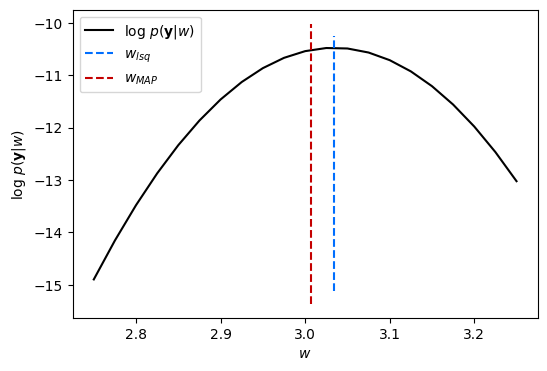

In [ ]:
# Likelihood function
def logLikelihood(y, x, N, w):
    return -N/2 * np.log(2*np.pi*sigma_n**2) - np.sum(np.square(y-w*x)/(2*sigma_n**2))

w_v = np.linspace(2.75,3.25,21)
logLikelihood_v = [-logLikelihood(y, x, n_points, w) for w in w_v]

# Plotting the likelihood
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(w_v, -np.array(logLikelihood_v), label='log $p(\mathbf{y}|w)$', color = csmlColor['black'])
ax.vlines(np.sum(x*y)/np.sum(np.square(x)),*ax.get_ylim(),linestyle='--',label='$w_{lsq}$',color=csmlColor['blue'])
ax.vlines(get_MAP(sigma, sigma_n),*ax.get_ylim(),linestyle='--',label='$w_{MAP}$', color=csmlColor['red'])
ax.set_xlabel("$w$")
ax.set_ylabel("log $p(\mathbf{y}|w)$")
plt.legend()
plt.show()

We can see that the MAP estimate is different from the least-squares estimate. The MAP estimate is a trade-off between the prior and the likelihood. The prior is a regularisation term which prevents overfitting.

Let us see other interesting insights.

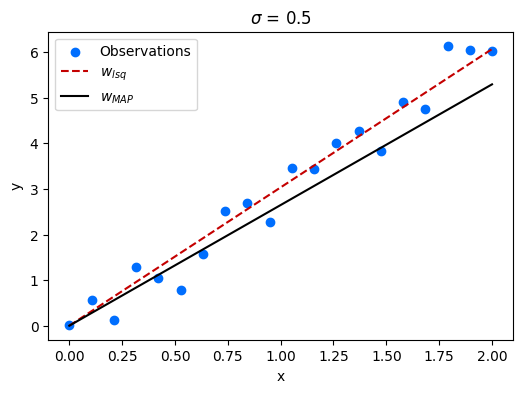

In [ ]:
np.random.seed(4)

# Prior standard deviation
sigma = 0.5

# Error standard deviation
sigma_n = 1

# Observations
plt.figure(figsize=(6,4))
plt.scatter(x, y, color = csmlColor['blue'], label = 'Observations') # Observations

# Maximum likelihood
plt.plot(x, w_lsq*x, label=r'$w_{lsq}$',  linestyle='--', color = csmlColor['red']) # Maximum likelihood

# Maximum posterior
w_map = get_MAP(sigma, sigma_n)
plt.plot(x, w_map*x, label=r'$w_{MAP}$', color = csmlColor['black']) # Maximum a posteriori
plt.legend()

plt.title(f'$\sigma$ = {sigma}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Questions to think about:
1. What happens if the prior standard deviation ($\sigma$) is very high?
2. What happens if the prior standard deviation ($\sigma$) is very low?

Higher value of prior standard deviation $\sigma$ denotes that weak regularization, and thus MAP estimate gets closer to least-squares estimate if $\sigma$ is too high. In other words, this means that we don't trust our prior belief and trust the observation data.

## Posterior distribution over model parameters ($\boldsymbol{w}$)

To find the posterior distribution, we can multiply the likelihood and the prior, and normalise it by completing squares as we did in the first exercise.

Let's take an example where we need to find the gradient and intercept of a straight line (model) for a given prior and set of observations.

The resulting posterior can be derived as

\begin{align}
p(\boldsymbol{w}|X, \mathbf{y}) &\sim \mathcal{N}(\mathbf{m}_n, S_n) \tag{12.1}\\
\mathbf{m}_n &= \left(X^TX + \frac{\sigma_n^2}{\sigma^2}I\right)^{-1}X^T\mathbf{y} \tag{12.2}\\
S_n &= \left(\frac{1}{\sigma^2}I + \frac{X^TX}{\sigma_n^2}\right)^{-1} \text{.} \tag{12.3}
\end{align}

Now, let's find the model parameters and the posterior destribution.

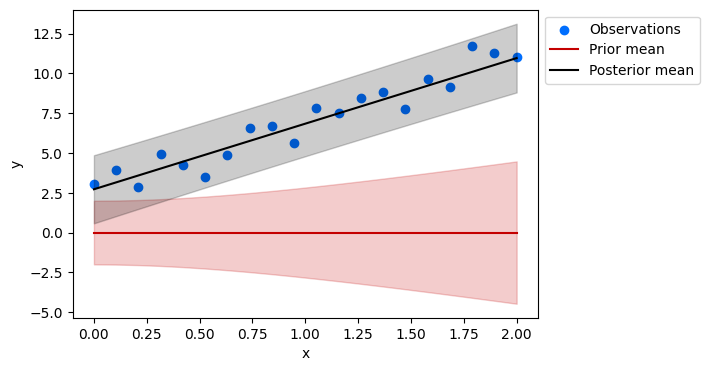

Prior mean: [0. 0.]
Prior covariance matrix: [[1. 0.]
 [0. 1.]]
Posterior mean: [2.7203164  4.12230398]
Posterior covariance matrix: [[ 0.14493143 -0.102178  ]
 [-0.102178    0.10728691]]


In [ ]:
np.random.seed(4) # Setting seed for reproducibility

# Number of points
N = 20
x = np.linspace(0,2,N).reshape(-1,1) # x values
x_extra = np.hstack([np.ones((N, 1)), x])

# True intercept and gradient
w_0, w_1 = 3, 4

# Error standard deviation
sigma_n = 1

# Prior standard deviation
sigma = 1

# Observations
y = w_0 + w_1*x + np.random.multivariate_normal(np.zeros(N), np.eye(N)*sigma_n**2).reshape(-1,1)

# Prior mean and covariance matrix
m_0 = np.zeros((2,1)) # Prior mean
s_0 = np.eye(2)*sigma**2 # Prior covariance matrix

# Posterior distribution
mu_n = np.linalg.inv(x_extra.T@x_extra + np.eye(2)*(sigma_n**2/sigma**2))@x_extra.T@y # mean
cov_n = np.linalg.inv((x_extra.T@x_extra)/sigma_n**2 + np.eye(2)*(1/sigma**2)) # Covariance matrix

# Prior mean and standard deviation
y_pr_mean = (x_extra@m_0).squeeze()
y_pr_cov = x_extra@s_0@x_extra.T
y_pr_std2 = np.sqrt(y_pr_cov.diagonal())*2

# Posterior mean and standard deviation
y_mean = (x_extra@mu_n).squeeze()
y_cov = x_extra@cov_n@x_extra.T + np.eye(N)*sigma_n**2
y_std2 = np.sqrt(y_cov.diagonal())*2


plt.figure(figsize=(6,4))
plt.scatter(x, y, color = csmlColor['blue'], label='Observations')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y_pr_mean, label='Prior mean', color = csmlColor['red'])
plt.fill_between(x_extra[:,1], y_pr_mean-y_pr_std2, y_pr_mean+y_pr_std2, alpha=0.2, color = csmlColor['red']) # Prior 95% confidence
plt.plot(x, y_mean, label='Posterior mean', color = csmlColor['black'])
plt.fill_between(x_extra[:,1], y_mean-y_std2, y_mean+y_std2, alpha=0.2, color = csmlColor['black']) # Posterior 95% confidence
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# Print the prior and posterior mean and covariance matrix
print(f'Prior mean: {m_0.squeeze()}')
print(f'Prior covariance matrix: {s_0}')

print(f'Posterior mean: {mu_n.squeeze()}')
print(f'Posterior covariance matrix: {cov_n}')

Next, we will visualise the posterior distribution over $\boldsymbol{w}$.

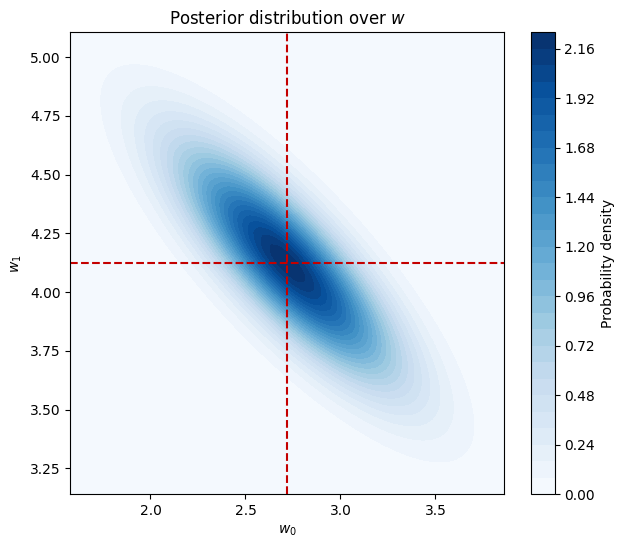

In [ ]:
# Plotting the posterior distribution over w_0 and w_1
w_0_range = np.linspace(mu_n[0] - 3 * np.sqrt(cov_n[0, 0]), mu_n[0] + 3 * np.sqrt(cov_n[0, 0]), 100)
w_1_range = np.linspace(mu_n[1] - 3 * np.sqrt(cov_n[1, 1]), mu_n[1] + 3 * np.sqrt(cov_n[1, 1]), 100)
W_0, W_1 = np.meshgrid(w_0_range, w_1_range)

# Calculate the bivariate Gaussian pdf for the posterior
Z = multivariate_normal.pdf(np.dstack((W_0, W_1)), mean=mu_n.squeeze(), cov=cov_n)

# Plot the posterior distribution as a contour plot
plt.figure(figsize=(7, 6))
plt.contourf(W_0, W_1, Z, levels=30, cmap='Blues')
plt.xlabel(r'$w_0$')
plt.ylabel(r'$w_1$')
plt.title(r'Posterior distribution over $w$')
plt.colorbar(label = 'Probability density')

# Draw vertical and horizontal lines for optimal w_0 and w_1
plt.axvline(mu_n[0], linestyle='--', label='Posterior mean $w_0$', color = csmlColor['red'])
plt.axhline(mu_n[1], linestyle='--', label='Posterior mean $w_1$', color = csmlColor['red'])
plt.show()

Questions to think about:
1. Why is the $w_0$ and $w_1$ are negatively correlated?
2. Which quadrant of the plot is more probable?


**Answers - Q1**

When fitting a line to data, the intercept and gradient are negatively correlated because they often compensate for each other to explain the same data points. This is particularly clear when the data has some spread (i.e., noise or variability):

**Intercept increase:** If the intercept $w_0$ increases, the line shifts upwards, making it too high for the same data points.

**Gradient decrease:** To compensate for this upward shift, the gradient $w_1$ would typically decrease (negative change), causing the slope to become flatter. This flattening brings the line back closer to the data points.

Similarly:

**Intercept decrease:** If the intercept decreases, the line shifts downward.

**Gradient increase:** To offset this downward shift, the gradient will likely increase, steepening the slope and bringing the line closer to the data.

**Answers - Q2**

The second quadrant is more probable because the values are negatively correlated.